##Importar librerías

In [ ]:
!pip install imblearn
!pip install numpy
!pip install pandas
!pip install snips
!pip install ctgan
!pip install delayed
!pip install -U imbalanced-learn
!pip install scikit-learn

  Created wheel for snips: filename=snips-1.0.0-py3-none-any.whl size=2358 sha256=cc25063c2304bf1151cb8619703c36040c1e9c90ec73268b19ca6c5144ab0e82
  Stored in directory: /root/.cache/pip/wheels/d2/99/76/e9b89daf5e273acb9f90c26220b5802594984bb35159a602e1
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=fd7ea4e2fab4f1cce7a163016ceb81e2b6ccffd80c5247a45f318b1c861a59a5
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built snips pyperclip
     |████████████████████████████████| 9.5 MB 7.7 MB/s 
     |████████████████████████████████| 22.3 MB 1.5 MB/s 
     |████████████████████████████████| 296 kB 59.1 MB/s 
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfu

     |████████████████████████████████| 85 kB 2.1 MB/s 
     |████████████████████████████████| 72 kB 519 kB/s 
     |████████████████████████████████| 189 kB 5.1 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

##Leyendo los datos

In [ ]:
data = pd.read_csv("sample_data/winequalityN.csv")

In [ ]:
data.describe()

fixed acidity  volatile acidity  ...      alcohol      quality
count    6487.000000       6489.000000  ...  6497.000000  6497.000000
mean        7.216579          0.339691  ...    10.491801     5.818378
std         1.296750          0.164649  ...     1.192712     0.873255
min         3.800000          0.080000  ...     8.000000     3.000000
25%         6.400000          0.230000  ...     9.500000     5.000000
50%         7.000000          0.290000  ...    10.300000     6.000000
75%         7.700000          0.400000  ...    11.300000     6.000000
max        15.900000          1.580000  ...    14.900000     9.000000

[8 rows x 12 columns]

In [ ]:
data.shape

(6497, 13)

In [ ]:
data.head()

type  fixed acidity  volatile acidity  ...  sulphates  alcohol  quality
0  white            7.0              0.27  ...       0.45      8.8        6
1  white            6.3              0.30  ...       0.49      9.5        6
2  white            8.1              0.28  ...       0.44     10.1        6
3  white            7.2              0.23  ...       0.40      9.9        6
4  white            7.2              0.23  ...       0.40      9.9        6

[5 rows x 13 columns]

In [ ]:
#Cantidad de datos perdidos por columna en los datos
datosPerdidos = (data.isnull().sum())
print(datosPerdidos[datosPerdidos > 0])

fixed acidity       10
volatile acidity     8
citric acid          3
residual sugar       2
chlorides            2
pH                   9
sulphates            4
dtype: int64


In [ ]:
#fill missing value with their mean value
data.fillna(data.mean(), inplace=True)

##Visualización de los datos

In [ ]:
#tipos de vino
data['type'].unique()

array(['white', 'red'], dtype=object)

In [ ]:
data["type"].value_counts()

white    4898
red      1599
Name: type, dtype: int64

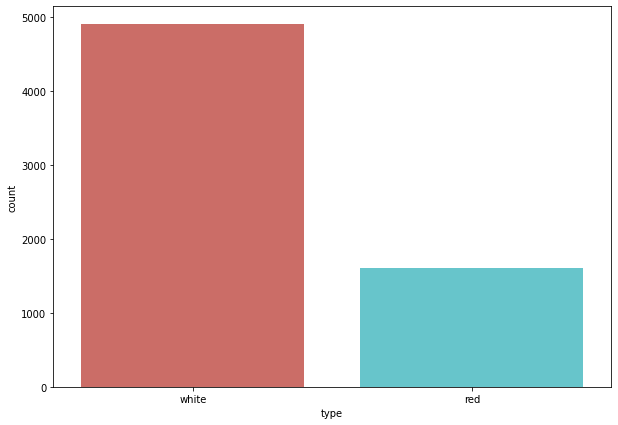

In [ ]:

plt.figure(figsize=(10,7))
sns.countplot(x='type', data=data, palette='hls')
plt.show()

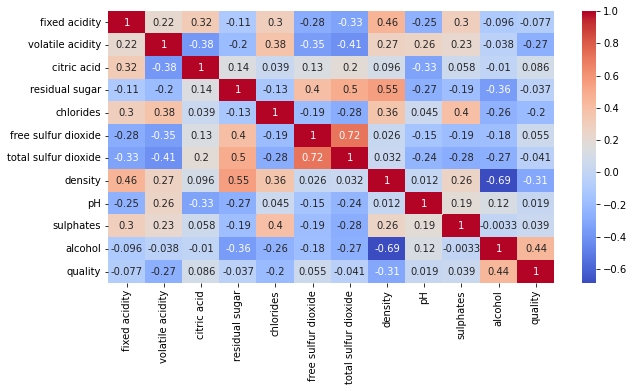

In [ ]:
# correlacion
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot = True, cmap='coolwarm')
plt.show()

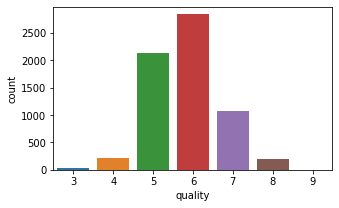

In [ ]:
#ploting countplot quality 
plt.figure(figsize=(5,3))
sns.countplot(x='quality',data=data)

In [ ]:
#Convertir de categorico a numerico
data['type']=pd.get_dummies(data['type'],drop_first=True)
data.head()

type  fixed acidity  volatile acidity  ...  sulphates  alcohol  quality
0     1            7.0              0.27  ...       0.45      8.8        6
1     1            6.3              0.30  ...       0.49      9.5        6
2     1            8.1              0.28  ...       0.44     10.1        6
3     1            7.2              0.23  ...       0.40      9.9        6
4     1            7.2              0.23  ...       0.40      9.9        6

[5 rows x 13 columns]

In [ ]:
data['Excellent_quality'] = [ 1 if x>=7 else 0 for x in data.quality] 
data

type  fixed acidity  ...  quality  Excellent_quality
0        1            7.0  ...        6                  0
1        1            6.3  ...        6                  0
2        1            8.1  ...        6                  0
3        1            7.2  ...        6                  0
4        1            7.2  ...        6                  0
...    ...            ...  ...      ...                ...
6492     0            6.2  ...        5                  0
6493     0            5.9  ...        6                  0
6494     0            6.3  ...        6                  0
6495     0            5.9  ...        5                  0
6496     0            6.0  ...        6                  0

[6497 rows x 14 columns]

In [ ]:
y = data['Excellent_quality']
y

0       0
1       0
2       0
3       0
4       0
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: Excellent_quality, Length: 6497, dtype: int64

In [ ]:
y.value_counts()

0    5220
1    1277
Name: Excellent_quality, dtype: int64

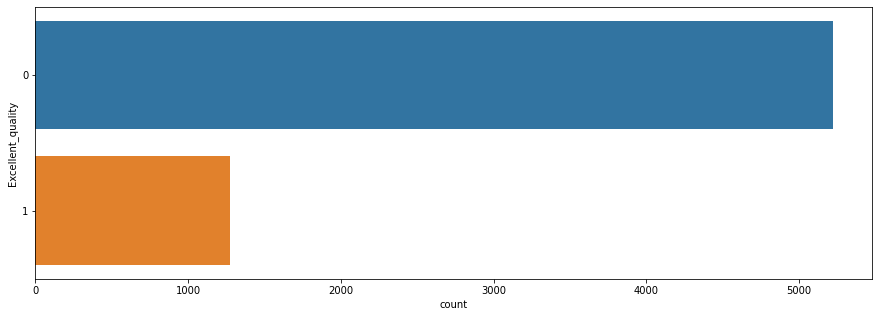

In [ ]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Excellent_quality' , data = data)
plt.show()

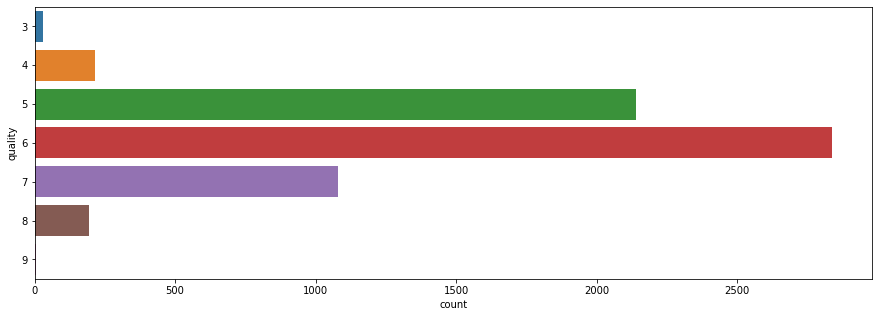

In [ ]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'quality' , data = data)
plt.show()

In [ ]:
data["Excellent_quality"].value_counts()

0    5220
1    1277
Name: Excellent_quality, dtype: int64

In [ ]:
data.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'Excellent_quality'],
      dtype='object')

In [ ]:
from ctgan import CTGANSynthesizer

ctgan = CTGANSynthesizer()

payment_columns = ['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', "Excellent_quality"]

In [ ]:
ctgan.fit(data.loc[data['Excellent_quality'] == 1].head(2500), payment_columns,epochs=2)

In [ ]:
samples = ctgan.sample(3500)

In [ ]:
data = data.append(samples,ignore_index=False, verify_integrity=False, sort=None)

In [ ]:
print(data.shape)
print(pd.value_counts(data['Excellent_quality'], sort = True))

(9997, 14)
0    5220
1    4777
Name: Excellent_quality, dtype: int64


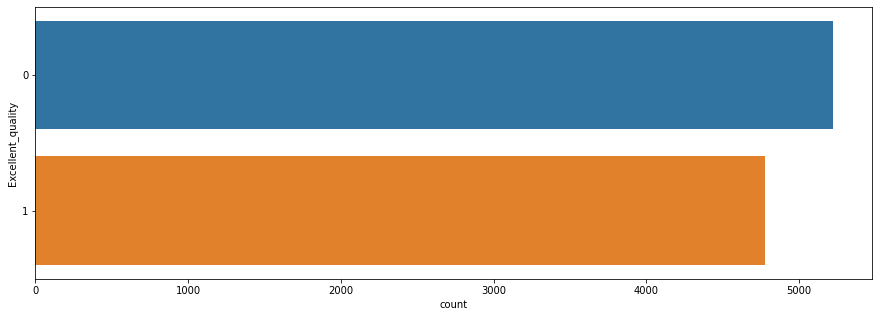

In [ ]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Excellent_quality' , data = data)
plt.show()

In [ ]:
x1=data[['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality']]
x1.shape

Y = data[["Excellent_quality"]]
Y.shape

(9997, 1)

##Modelo de Minería de Datos

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x1, Y,
                                                   test_size=0.3,
                                                   random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2)

In [ ]:
neigh.fit(X_train,y_train.values.ravel())

KNeighborsClassifier(n_neighbors=2)

In [ ]:
predicted_value = neigh.predict(X_test)
predicted_value

array([0, 0, 0, ..., 1, 1, 0])

In [ ]:
#will first check which is the best k
Ks =10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
#ConfustionMx = [];
for n in range(1,Ks):
    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n,p=2).fit(X_train,y_train.values.ravel())
    yhat=neigh.predict(X_test)
    #yhat = knn_predictions(X_train,y_train,X_test,n)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test.values.ravel())/np.sqrt(yhat.shape[0])

print( "The best accuracy was:", np.round(mean_acc.max()*100,2), "% with k=", mean_acc.argmax()+1)

The best accuracy was: 84.37 % with k= 1


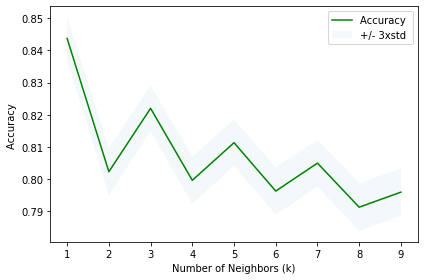

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.05)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (k)')
plt.tight_layout()
plt.show()

##Evaluación

In [ ]:
y_test.groupby("Excellent_quality").Excellent_quality.count()

Excellent_quality
0    1546
1    1454
Name: Excellent_quality, dtype: int64

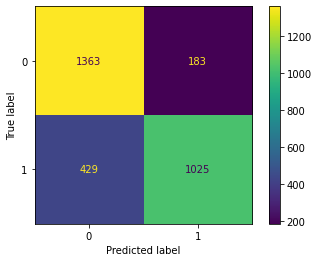

In [ ]:
sklearn.metrics.plot_confusion_matrix(neigh, X_test, y_test)

In [ ]:
print(classification_report(y_test, predicted_value))

              precision    recall  f1-score   support

           0       0.74      0.95      0.83      1546
           1       0.93      0.64      0.76      1454

    accuracy                           0.80      3000
   macro avg       0.83      0.80      0.80      3000
weighted avg       0.83      0.80      0.80      3000



##Resultados
El modelo tiene una presición bastante buena 80%, puede ser usado para calificar la calidad de un vino. Sin embargo, se creo una nueva columna llamada "Excellent quality", la cual consistía en filtrar los mejor vinos de los peores con 1 y 0 respectivamente. Se balancearon los datos para mejor la precision.

In [ ]:
lst = [1,6.6,0.16,0.4,1.5,0.044,48,143,0.9912,3.54,0.52,12.4,7]
df = pd.DataFrame([lst])
df.columns = ['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality']


predictValues = neigh.predict(df)
print(predictValues)


[1]


In [ ]:
import pickle
filename = 'Calidad_Vino.ipynb'
pickle.dump(neigh, open(filename, 'wb'))